#**SIT 720 - Machine Learning**

Lecturer: Chandan Karmakar | karmakar@deakin.edu.au

School of Information Technology,
<br/>Deakin University, VIC 3125, Australia.

#**Assessment Task 1 (20 marks)**

##**Submission Instruction**
1.  Student should insert Python code or text responses into the cell followed by the question.

2.  For answers regarding discussion or explanation, **maximum five sentences are suggested**.

3.  Rename this notebook file appending your student ID. For example, for student ID 1234, the submitted file name should be A0_1234.ipynb.

4.  Insert your student ID and name in the following cell.

In [71]:
# Student ID: 220129254

# Student name: Alina Kriutchenko




##**Background**
Selection of housing is always difficult for someone seeking for a suitable one as it includes various factors and preferences. People prefer to buy a house considering many criteria like- population, quality of life, financial capability, as well as social and natural environments around the housing block. In this assignment you will be helping people choosing suitable housing for them according to their needs.
##**Dataset**
**Dataset file name:** housing_dataset.csv

**Dataset description:** Dataset contains total 10 features (columns). It contains the location, housing age, population, number of families in a housing (block), number of rooms, average income of the families in that housing, ocean proximity and other informaiton. Each row indicates a record of a housing block containing the features mentioned earlier.

**Features:** 

1.   latitude (float): Latitude of the location of a housing in conventional geospace
2.   longitude (float): Longitude of the location of a housing in conventional geospace
3.   housing_age (int): Age of the housing in year, the higher number indicates the older housing
4.    total_rooms (int): Total number of rooms in a housing
5.    total_bedrooms (int): Total number of bedrooms in a housing
6.    population (int): Total population of a housing
7.    families (int): Total number of families living in a housing
8.    average_income (float): Average income of the member of a housing in a scale of Tousand Dollar Per Month
9.    ocean_proximity (string): Describing how close the housing is to the ocean
10.   house_value (int): Average individual house price of a housing in Dollers




##**Part-1: Basic Calculations:**  *(8 marks: 8 questions x 1 marks each)*


1.   Find the distances of the farthest and nearest housing blocks from the house block described in the first row of the dataset.

In [72]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math

housing_dataset = pd.read_csv(r"C:\Users\alina\OneDrive\Documents\Units\Trimester 2\SIT720\New folder\housing_dataset.csv")
housing_dataset.head(10)

,longitude,latitude,housing_age,total_rooms,total_bedrooms,population,families,average_income,ocean_proximity,house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [73]:
#Earth R
R= 6373.0

#Compare house 1 and house 1635
lat1 = math.radians(37.88)
lon1 = math.radians(-122.23)
lat2 = math.radians(37.88)
lon2 = math.radians(-122.22)

dislon = lon2 - lon1
dislat = lat2 - lat1

a = math.sin(dislat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dislon / 2)**2
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
distance = R * c
print('The distance to the nearest housing block :',  distance)

The distance to the nearest housing block : 0.8779353633719376


In [74]:
#Earth R
R= 6373.0

#Compare house 1 and house 13926
lat1 = math.radians(37.88)
lon1 = math.radians(-122.23)
lat2 = math.radians(34.19)
lon2 = math.radians(-114.31)

dlon = lon2 - lon1
dlat = lat2 - lat1

aa = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
cc = 2 * math.atan2(math.sqrt(aa), math.sqrt(1 - aa))
distance = R * cc
print('The distance to the farthest housing block :',  distance)

The distance to the farthest housing block : 821.7113545562466


2.   Calculate the average age of the house blocks near the ocean.

In [75]:
#houses near the ocean:
houses_near_ocean = housing_dataset.loc[housing_dataset['ocean_proximity'] == 'NEAR OCEAN']

#the average age of houses near the ocean:
average_age = houses_near_ocean["housing_age"].mean()
print(average_age)


29.347253574115875


3.   Find the income of the housing block with the most and least population density (per family).

In [76]:
#Create a column with population density per family:
housing_dataset['pop_density'] = housing_dataset['families']/housing_dataset['total_rooms']
housing_dataset
#print(housing_dataset)

#Choose the row with the least population density:
least_pop_density = housing_dataset.loc[housing_dataset['pop_density'].idxmin()]
#min_pop_den = least_pop_density['pop_density']
#least_pop_density is 0.00704676

#Choose the row with the most population density:
most_pop_density = housing_dataset.loc[housing_dataset['pop_density'].idxmax()]
#most_pop_den = most_pop_density['pop_density']
#Most_pop_density is 1.18182


#The average income with the least population density:
avr_inc_least_density = least_pop_density['average_income']

#The average income with the most population density:
avr_inc_most_density = most_pop_density['average_income']

print('The average income for the least population density is: ', avr_inc_least_density, 'thousand dollars per month')
#1.875
print('The average income for the most population density is: ', avr_inc_most_density, 'thousand dollars per month')
#2.875



The average income for the least population density is:  1.875 thousand dollars per month
The average income for the most population density is:  2.875 thousand dollars per month


4.   Calculate the price difference between the latest and oldest housing block from the dataset.

In [77]:
#Choose houses with miinimum age
a = housing_dataset[housing_dataset.housing_age == housing_dataset.housing_age.min()]
#The average price of house with a minimum age:
avr_price_lat_house = a.loc[:,"house_value"].mean()


#Choose houses with maximum age
b = housing_dataset[housing_dataset.housing_age == housing_dataset.housing_age.max()]
#The average price of house with a maximum age:
avr_price_old_house = b.loc[:,"house_value"].mean()


price_difference = abs(avr_price_lat_house - avr_price_old_house)
print('The price difference between the latest and oldest housing block is: ', price_difference)

The price difference between the latest and oldest housing block is:  131120.87117046345


5.   Calculate the cheapest price per room from the dataset.

In [78]:
#The price per room:
price_per_room = housing_dataset['house_value']/housing_dataset['total_rooms']

#The minimum price per room:
min_price_per_room = price_per_room.min()
print('The cheapest price per room is: ', min_price_per_room)


The cheapest price per room is:  1.595444807757357


6.   Calculate the population density (per family) for the most and least wealthy housing blocks in the dataset.

In [79]:
#Add the wealth of housing blocks column to the dataset:
housing_dataset['housing_wealth'] = housing_dataset['house_value']/housing_dataset['total_rooms']

#The most and the least wealthy housing:
most_wealthy_housing = housing_dataset.loc[housing_dataset['housing_wealth'].idxmax()]
least_wealthy_housing = housing_dataset.loc[housing_dataset['housing_wealth'].idxmin()]

#print(most_wealthy_housing)
#print(least_wealthy_housing)

population_density_the_most_wealthy = most_wealthy_housing['families']/most_wealthy_housing['total_rooms']
print('The population density (per family) for the most wealthy housing blocks is: ', population_density_the_most_wealthy)

population_density_the_least_wealthy = least_wealthy_housing['families']/least_wealthy_housing['total_rooms']
print('The population density (per family) for the most wealthy housing blocks is: ', population_density_the_least_wealthy)


The population density (per family) for the most wealthy housing blocks is:  1.0
The population density (per family) for the most wealthy housing blocks is:  0.15931897620926824


7.   Calculate and print the total housing blocks located in the same place.

In [80]:
#Group and count houses by location:
n_by_state = housing_dataset.groupby("ocean_proximity")["longitude"].count()

print('The total housing blocks located in different locations:')
n_by_state.head()

The total housing blocks located in different locations:


ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
Name: longitude, dtype: int64

8.   Calculate the price of expensive room grouped by ocean proximity.

In [81]:
#Group rows by ocean proximity:
house_1h_ocean = housing_dataset.loc[housing_dataset['ocean_proximity'] == '<1H OCEAN']
house_inland = housing_dataset.loc[housing_dataset['ocean_proximity'] == 'INLAND']
house_island = housing_dataset.loc[housing_dataset['ocean_proximity'] == 'ISLAND']
house_near_bay = housing_dataset.loc[housing_dataset['ocean_proximity'] == 'NEAR BAY']
house_near_ocean = housing_dataset.loc[housing_dataset['ocean_proximity'] == 'NEAR OCEAN']


#The price of expensive room grouped by ocean proximity:

expensive_1h_ocean = house_1h_ocean['housing_wealth'].max()
print('An expensive room less than 1h from the ocean is: ', expensive_1h_ocean, 'dollars')

expensive_inland = house_inland['housing_wealth'].max()
print('An expensive room inland costs: ', expensive_inland, 'dollars')

expensive_island = house_island['housing_wealth'].max()
print('An expensive room on the island costs: ', expensive_island, 'dollars')

expensive_bay = house_near_bay['housing_wealth'].max()
print('An expensive room near bay costs: ', expensive_bay, 'dollars')

expensive_ocean = house_near_ocean['housing_wealth'].max()
print('An expensive room near the ocean: ', expensive_ocean, 'dollars')

An expensive room less than 1h from the ocean is:  22500.0 dollars
An expensive room inland costs:  68750.0 dollars
An expensive room on the island costs:  451.8072289156627 dollars
An expensive room near bay costs:  62500.125 dollars
An expensive room near the ocean:  23333.333333333332 dollars


##**Part-2: Visualization:**  *(6 marks: 3 question x 2 marks each)*


1.   Draw the population scatter plot against housing age and another against ocean proximity. From the graph conclude an assumption.

In general, the dataset contains more latest houses. Overall, the population of the house blocks is less than 10000 people. The are only a few blocks with a population between 25000 and 35000 people.
The general trend shows that very few people prefer to live on the island. The majority choose a house less than 1H from the ocean.


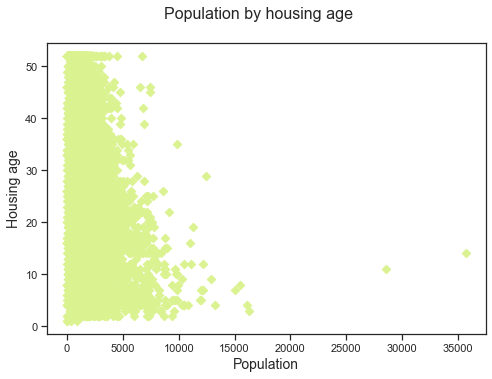

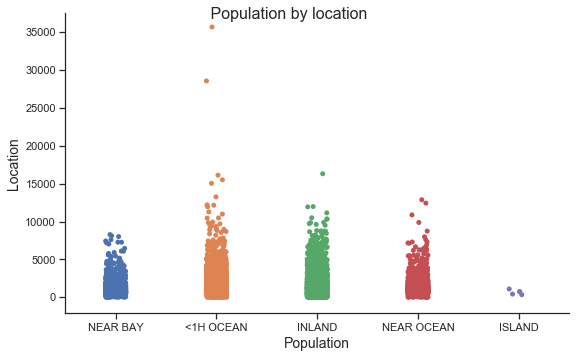

In [82]:
#The population scatter plot against housing age:
plt.scatter(housing_dataset.population, housing_dataset.housing_age, color = '#DBF291', marker='D')
plt.scatter

plt.xlabel('Population', fontsize=14)
plt.ylabel('Housing age', fontsize=14)
plt.suptitle('Population by housing age', fontsize=16)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

fig = plt.gcf()
fig.set_size_inches(7, 5)

print('In general, the dataset contains more latest houses. Overall, the population of the house blocks is less than 10000 people. The are only a few blocks with a population between 25000 and 35000 people.')

#The population scatter plot against ocean proximity:
sns.catplot('ocean_proximity', 'population', data=housing_dataset);

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.xlabel('Population', fontsize=14)
plt.ylabel('Location', fontsize=14)
plt.suptitle('         Population by location', fontsize=16)

print('The general trend shows that very few people prefer to live on the island. The majority choose a house less than 1H from the ocean.')

2.  Draw a bar diagram of average values of all suitable columns. (excluding latitude, longitude and ocean proximity of course).

Text(0, 0.5, 'Frequency')

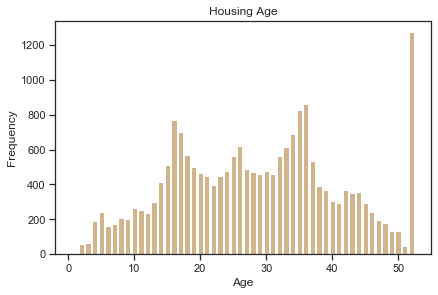

In [83]:
fig, ax = plt.subplots() 
# count
age_value = housing_dataset['housing_age'].value_counts() 
# x,y
house_age = age_value.index 
frequency_v = age_value.values 
# bar
ax.bar(house_age, frequency_v, color='tan') 
# 
ax.set_title('Housing Age') 
ax.set_xlabel('Age') 
ax.set_ylabel('Frequency')

3.   Visualize the differences in housing prices from the average price of housing using a bar diagram.

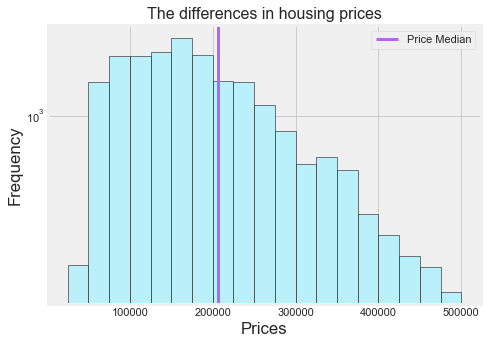

In [84]:
plt.figure(figsize=[7,5])

plt.style.use('fivethirtyeight')

priceV = housing_dataset['house_value']

bins = [25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000]

plt.hist(priceV, bins=bins, edgecolor='black', log=True, color='#B9F0F9')

median_price = housing_dataset.loc[:,"house_value"].mean()
color = '#fc4f30'

plt.axvline(median_price, color='#B266F1', label='Price Median', linewidth=3)

plt.legend()

plt.title('The differences in housing prices', fontsize=16)
plt.xlabel('Prices')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##**Part-3: File Management:**  *(6 marks: 2 question x 3 marks each)*

 

1.   Save the details of all housing blocks in a csv file having houses near oceans and  lower than the average of the housing value.

In [85]:
#split a housing value column:
price = housing_dataset[['house_value']]
#print(price)

#average house value:
av_price = np.mean(price)
#print('The average ', avr_price)

#houses near ocean:
h_near_o = housing_dataset.loc[housing_dataset['ocean_proximity'] == 'NEAR OCEAN']    
#print(houses_near_ocean)    
#This is 2658 rows x 12 columns

#houses near ocean and under average price:
houses_near_ocean_cheaper_than_avr = h_near_o.loc[h_near_o['house_value'] < 206856]     
print(houses_near_ocean_cheaper_than_avr)    
#This is 1144 rows x 12 columns

#Create csv file having houses near oceans and lower than the average of the housing value:
houses_near_ocean_cheaper_than_avr.to_csv(r'C:\Users\alina\OneDrive\Documents\Units\Trimester 2\SIT720\New folder\houses_near_ocean_cheaper_than_avr.csv')

       longitude  latitude  housing_age  total_rooms  total_bedrooms  \
1850     -124.17     41.80           16         2739           480.0   
1851     -124.30     41.80           19         2672           552.0   
1852     -124.23     41.75           11         3159           616.0   
1853     -124.21     41.77           17         3461           722.0   
1854     -124.19     41.78           15         3140           714.0   
...          ...       ...          ...          ...             ...   
20320    -119.15     34.25           36         3511           664.0   
20323    -119.12     34.23           35         2028           554.0   
20324    -119.12     34.25           31          737           146.0   
20349    -119.08     34.17           32          166            22.0   
20352    -119.09     34.22            8           40            10.0   

       population  families  average_income ocean_proximity  house_value  \
1850         1259       436          3.7557      NEAR OCEAN






2.   Create a new housing dataset (a csv file) having only the location, total rooms and housing price information.






In [86]:
loc_room_price = housing_dataset[['ocean_proximity','total_rooms', 'house_value']]
print(loc_room_price)
loc_room_price.to_csv(r'C:\Users\alina\OneDrive\Documents\Units\Trimester 2\SIT720\New folder\loc_room_price.csv')


      ocean_proximity  total_rooms  house_value
0            NEAR BAY          880       452600
1            NEAR BAY         7099       358500
2            NEAR BAY         1467       352100
3            NEAR BAY         1274       341300
4            NEAR BAY         1627       342200
...               ...          ...          ...
20635          INLAND         1665        78100
20636          INLAND          697        77100
20637          INLAND         2254        92300
20638          INLAND         1860        84700
20639          INLAND         2785        89400

[20640 rows x 3 columns]
